In [50]:
from collections import namedtuple 
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt  
from math import pi
from numpy import cos, sin
import numpy as np
import random


Point = namedtuple('Point', 'x y')

#-------------------------------------------------------------------------------------------------------------

class ConvexHull(object):  
    def __init__(self,R,num):
        self._R=R
        self._num=num
        self._hull_points = []
        self._points = []
        self._finish=[]
#-------------------------------------------------------------------------------------------------------------
    def add(self, point):
        self._points.append(point)
    def add_T(self, point):
        self._finish.append(point)
#-------------------------------------------------------------------------------------------------------------
    def _get_orientation(self, origin, p1, p2):
        '''
        Returns the orientation of the Point p1 with regards to Point p2 using origin.
        Negative if p1 is clockwise of p2.
        :param p1:
        :param p2:
        :return: integer
        '''
        difference = (
            ((p2.x - origin.x) * (p1.y - origin.y))
            - ((p1.x - origin.x) * (p2.y - origin.y))
        )

        return difference
#-------------------------------------------------------------------------------------------------------------
    def compute_hull(self):
        '''
        Computes the points that make up the convex hull.
        :return:
        '''
        points = self._points

        # get leftmost point
        start = points[0]
        min_x = start.x
        for p in points[1:]:
            if p.x < min_x:
                min_x = p.x
                start = p

        point = start
        self._hull_points.append(start)

        far_point = None
        while far_point is not start:

            # get the first point (initial max) to use to compare with others
            p1 = None
            for p in points:
                if p is point:
                    continue
                else:
                    p1 = p
                    break

            far_point = p1

            for p2 in points:
                # ensure we aren't comparing to self or pivot point
                if p2 is point or p2 is p1:
                    continue
                else:
                    direction = self._get_orientation(point, far_point, p2)
                    if direction > 0:
                        far_point = p2

            self._hull_points.append(far_point)
            point = far_point
#-------------------------------------------------------------------------------------------------------------
    def get_hull_points(self):
        if self._points and not self._hull_points:
            self.compute_hull()
        return self._hull_points
#-------------------------------------------------------------------------------------------------------------
   
#-------------------------------------------------------------------------------------------------------------
    def grow(self):
            # all points
            ch.add(Point(random.randint(-100, 100), random.randint(-100, 100)))

#-------------------------------------------------------------------------------------------------------------
    def hitcheck(self,x1,x2,y1,y2):
        dis=((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
        return dis
    

    def dis(self,A,B): 
        self._A=[]
        self._A.append(A)
        self._A.append(B)
        x = [p.x for p in self._A]
        y = [p.y for p in self._A]
        dis=((x[0] - x[1]) ** 2 + (y[0] - y[1]) ** 2) ** 0.5
        return dis


    def init(self): 
        A=Point(random.randint(-100, 100), random.randint(-100, 100)) 
        ch.add(A)
        while(True):
            x = [p.x for p in self._points]
            y = [p.y for p in self._points]
            if(len(x)==self._num):
                break
            else:
                B=Point(random.randint(-100, 100), random.randint(-100, 100)) 
                for i in range (len(x)):
                    rule=0
                    C=Point(x[i],y[i])                    
                    if(self.dis(C,B)<=2*self._R):
                        rule=rule+1                
                if(rule==0):
                    ch.add(B)                   
                for i in range (len(x)):
                    C=Point(x[i],y[i])     
                    if (self.dis(C,B)<=2*self._R):
                        del self._points[-1]
                        del self._points[-1]
                        break
    
    def PolyArea(self):
        x = [p.x for p in ch._hull_points]
        y = [p.y for p in ch._hull_points]
        return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
    
    def NumEstimation(self):
        self_area=pi*self._R**2
        total_area=self.PolyArea()
        return int(total_area/self_area)
    
    def TagertEstimation(self,num):
        target_len=self._R*2*num
        target_r=target_len/2/pi
        x = [p.x for p in ch._hull_points]
        y = [p.y for p in ch._hull_points]
        target_x=np.mean(x)
        target_y=np.mean(y)
        return target_r,target_x,target_y
    
    def display_target(self,target_x,target_y,target_r):
        self.target_x=target_x
        self.target_y=target_y
        self.target_r=target_r
        x = [p.x for p in self._points]
        y = [p.y for p in self._points]

        for j in range(len(x)):
            angles_circle = [i*pi/180 for i in range(0,360)]                 
            c_x = self._R*cos(angles_circle)+x[j]
            c_y = self._R*sin(angles_circle)+y[j]
            tar_x=target_r*cos(angles_circle)+target_x
            tar_y=target_r*sin(angles_circle)+target_y
           
            plt.plot(c_x, c_y, 'r')
            plt.plot(tar_x, tar_y, 'b')
            plt.plot(x[j], y[j], 'o')
            plt.axis('equal')
            plt.axis('scaled')
        plt.plot(target_x, target_y, 'bx')
        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Target place')
        plt.show()
    def display_ini(self):
   
        x = [p.x for p in self._points]
        y = [p.y for p in self._points]
        
        for j in range(len(x)):
            angles_circle = [i*pi/180 for i in range(0,360)]                 
            c_x = self._R*cos(angles_circle)+x[j]
            c_y = self._R*sin(angles_circle)+y[j]
            
            plt.plot(c_x, c_y, 'r')
         
            plt.plot(x[j], y[j], 'o')
            plt.axis('equal')
            plt.axis('scaled')
        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Convex Hull')
        plt.show()
    
    def display_move(self,point):
   
        r_x = point.x
        r_y = point.y
        for j in range(len(x)):
            angles_circle = [i*pi/180 for i in range(0,360)]                 
            c_x = self._R*cos(angles_circle)+r_x
            c_y = self._R*sin(angles_circle)+r_y
            tar_x=self.target_r*cos(angles_circle)+self.target_x
            tar_y=self.target_r*sin(angles_circle)+self.target_y
           
            plt.plot(c_x, c_y, 'r')
            plt.plot(tar_x, tar_y, 'b')
            plt.plot(x[j], y[j], 'o')
            plt.axis('equal')
            plt.axis('scaled')
        plt.plot(target_x, target_y, 'bx')
        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Target place')
        plt.show()     
        
        
    def FindTarget(self,p,lsp):
    # p is the circle parameter, lsp and lep is the two end of the line
        self.x0,self.y0,self.r0 = p
        x1,y1 = lsp
        x2=self.x0
        y2=self.y0
        k = (y1 - y2)/(x1 - x2)
        b0 = y1 - k*x1       
        a = k**2 + 1
        b = 2*k*(b0 - self.y0) - 2*self.x0
        c = (b0 - self.y0)**2 + self.x0**2 -self.r0**2
        delta = b**2 - 4*a*c       
        if delta >= 0:
            p1x = (-b - sqrt(delta))/(2*a)
            p2x = (-b + sqrt(delta))/(2*a)
            p1y = k*p1x + b0
            p2y = k*p2x + b0
            #print "result",p1x,p1y,p2x,p2y
            inp = [[p1x,p1y],[p2x,p2y]]
            P1=Point(p1x ,p1y)  
            P2=Point(p2x ,p2y)
            P3=Point(x1 ,y1)
            dis1=self.dis(P1,P3)
            dis2=self.dis(P2,P3)
            if (dis1<dis2):
                return P1
            else:
                return P2
    def DetectCollision(self,point):
    # p is the circle parameter, lsp and lep is the two end of the line
        x = [p.x for p in self._finish]
        y = [p.y for p in self._finish]
        count=0
        for j in range(len(x)):
            C=Point(x[j],y[j])   
            A=point
            dist=self.dis(A,C)
            
            if (dist<self._R):
                count=count+1
        if (count==0):
            return False
        else:
            return True
        
    def RandomMove(self,point):    
        C=Point(point.x+random.randint(-4, 4),point.y+random.randint(-4, 4))
        return C
    
    def FindNeighbor(self,point):  
        left=[]
        right=[]
        R_l=[]
        R_r=[]
        x = [p.x for p in self._finish]
        y = [p.y for p in self._finish]
        k = (point.y - self.y0)/(point.x - self.x0)
        b0 = point.y - k*point.x   
        A=point
        for j in range(len(x)):
            val=x[j]*k+b0
            if y[j]<val:
                point=Point(x[j],y[j])
                left.append(point)
            else:
                right.append(point)
        dis_l=10000
        dis_ll=0
        dis_r=10000
        dis_rr=0
        if left:
            x_l = [p.x for p in left]
            y_l = [p.y for p in left]
            for i in range (len(x_l)):
                P=Point(x_l[i],y_l[i])
                dist=self.dis(A,P)
                if (dist<dis_l):
                    dis_l=dist
                    r_l=P
            R_l=r_l
        if not left:
            x_l = [p.x for p in right]
            y_l = [p.y for p in right]
            for i in range (len(x_l)):
                P=Point(x_l[i],y_l[i])
                dist=self.dis(A,P)
                if (dist>dis_ll):
                    dis_l=dist
                    r_l=P
            R_l=r_l
        if right:
            x_l = [p.x for p in right]
            y_l = [p.y for p in right]
            for i in range (len(x_l)):
                P=Point(x_l[i],y_l[i])
                dist=self.dis(A,P)
                if (dist<dis_r):
                    dis_r=dist
                    r_r=P
            R_r=r_r
        if not right:
            x_l = [p.x for p in left]
            y_l = [p.y for p in left]
            for i in range (len(x_l)):
                P=Point(x_l[i],y_l[i])
                dist=self.dis(A,P)
                if (dist>dis_rr):
                    dis_l=dist
                    r_r=P
            R_r=r_r
            
            
        return R_r,R_l
                
                
            

---------------------STEP1--------------------------
 on hull: [Point(x=-97, y=18), Point(x=-95, y=-65), Point(x=11, y=-98), Point(x=87, y=-98), Point(x=100, y=-4), Point(x=97, y=42), Point(x=85, y=71), Point(x=62, y=98), Point(x=-65, y=94), Point(x=-96, y=64), Point(x=-97, y=18)]
---------------------STEP2--------------------------
Convex hull area: 34157.5
---------------------STEP3--------------------------
The estimated number of robots: 169 --> This is the upbound.
---------------------STEP4--------------------------
The estimated target shape: 430.35496612 -0.727272727273 12.7272727273


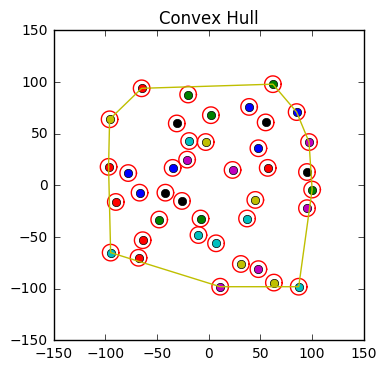

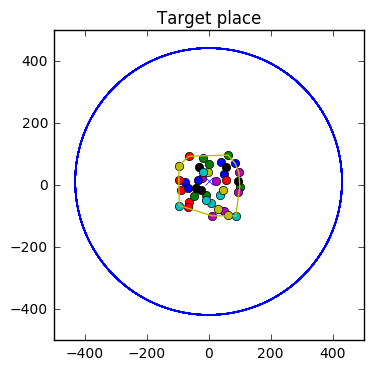

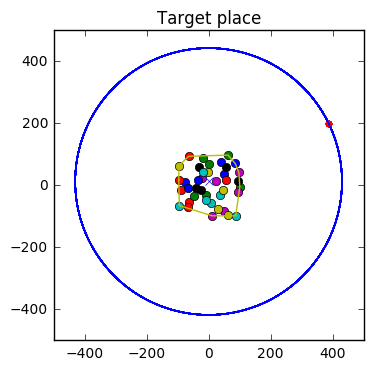

---------------------STEP5--------------------------
The target position for this robot is: Point(x=387.60870264784916, y=198.20117141389812)


In [51]:
if __name__ == '__main__':  
    ch = ConvexHull(8,40)
    ch.init()
    x = [p.x for p in ch._points]
    y = [p.y for p in ch._points]
    
    print"---------------------STEP1--------------------------"
    print" on hull:", ch.get_hull_points()
    print"---------------------STEP2--------------------------"
    print"Convex hull area:", ch.PolyArea()
    num=ch.NumEstimation()
    print"---------------------STEP3--------------------------"
    print"The estimated number of robots:", num,"--> This is the upbound."
    target_r,target_x,target_y=ch.TagertEstimation(num)
    print"---------------------STEP4--------------------------"
    print "The estimated target shape:",target_r,target_x,target_y
    ch.display_ini()
    ch.display_target(target_x,target_y,target_r)
    p=[target_x,target_y,target_r]
    this_robot=[x[0],y[0]]
    target_p0=ch.FindTarget(p,this_robot)
    ch.display_move(target_p0)
    print"---------------------STEP5--------------------------"
    print"The target position for this robot is:", target_p0

In [13]:
type(target_p0)

__main__.Point

In [22]:
a=[2]
if  a:
  print("List is empty")

List is empty
